## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np
import pandas as pd

import scipy.stats as scs
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

### Osemn process

![](osemn.png)

### Custom functions

In [2]:
# data conditioning function

def check_only_one_floor(val):
    if val == 1:
        return 1
    return 0

### Gather Data

In [3]:
df = pd.read_csv("kc_house_data.csv")

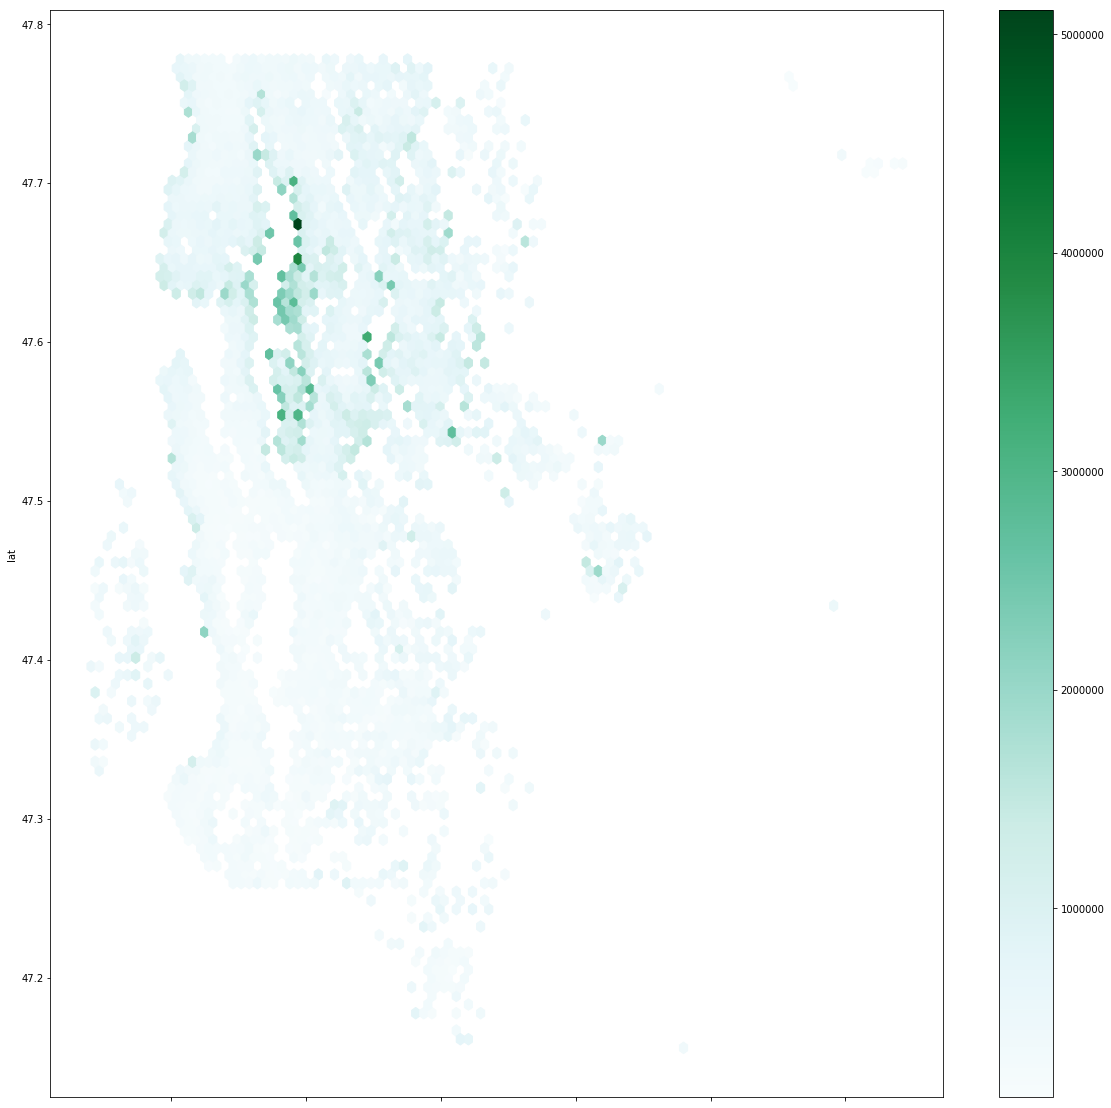

In [7]:
hexbin = df.plot.hexbin(x='long', y='lat', C='price', figsize=(20, 20))

In [8]:
fig = hexbin.get_figure()

In [9]:
fig.savefig('hexbin.png')

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
# fill nans with 0s this makes the most sense
df.fillna(value=0, inplace=True)

In [16]:
df.shape

(21597, 21)

In [17]:
df.info()
# I see 2 object columns data and sqft_basement
# there is an 'id' column, will probably drop this
# object usually signifies a placeholder value of a string type or a dictionary type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [18]:
df.describe()

# which columns were left out, the object columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Scrubbing the Data

#### Cleaning null values and placeholders

In [19]:
df = df.drop("id", axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [20]:
# counts null values in each column
# so sqft_basement has no null values
# but it definitely contains strings
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
# let's run value_counts on df.sqft_basement

df.sqft_basement.value_counts()[:5]

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [22]:
# how can i handle these question marks to get the median and mean

# changing all the values to numerical strings
df.loc[df["sqft_basement"]=="?", ['sqft_basement']]='-1.0'

df["sqft_basement"].value_counts()

df["sqft_basement"] = df["sqft_basement"].astype(float).astype(int)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [23]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.695560,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.833509,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,-1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
sqft_basement_mean = df.loc[df.sqft_basement!=-1, ['sqft_basement']].mean()
sqft_basement_med = df.loc[df.sqft_basement!=-1, ['sqft_basement']].median()
sqft_basement_mean, sqft_basement_med

(sqft_basement    291.851724
 dtype: float64, sqft_basement    0.0
 dtype: float64)

In [25]:
df["sqft_basement"].replace(to_replace=-1, value=0, inplace=True)

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Condition

#### binning values, playing with null values, normalizing data, standardizing data
#### manipulating data to fit OLS assumptions
#### Grouping data to create categories that might make sense for your data


#### example, let's bin some of our data

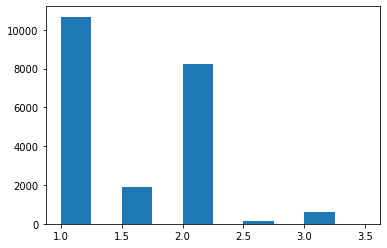

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [26]:
plt.hist(df.floors)
plt.show()

display(df.floors.value_counts())

In [27]:
# let's make it categorial for greater than 1 floor
# 1.0 -> 1
# 2.0, 3.0, 4.0, 5.0 -> 0

df["only_one_floor"] = df["floors"].apply(check_only_one_floor)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,only_one_floor
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


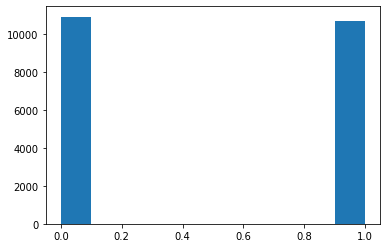

In [29]:
plt.hist(df.only_one_floor)
plt.show()

### Exploration (Analysis)

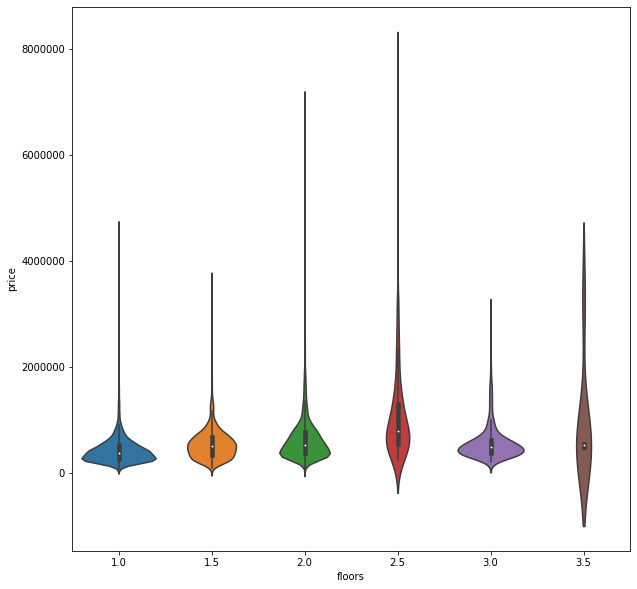

In [30]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='floors', y='price', data=df)
plt.show()

**Violin Plot Summary**
- The means across the group are very similar
- They have a similar distribution across the board
- 2.5 floors has the highest prices and the largest range
- 3.5 floors has negative prices...

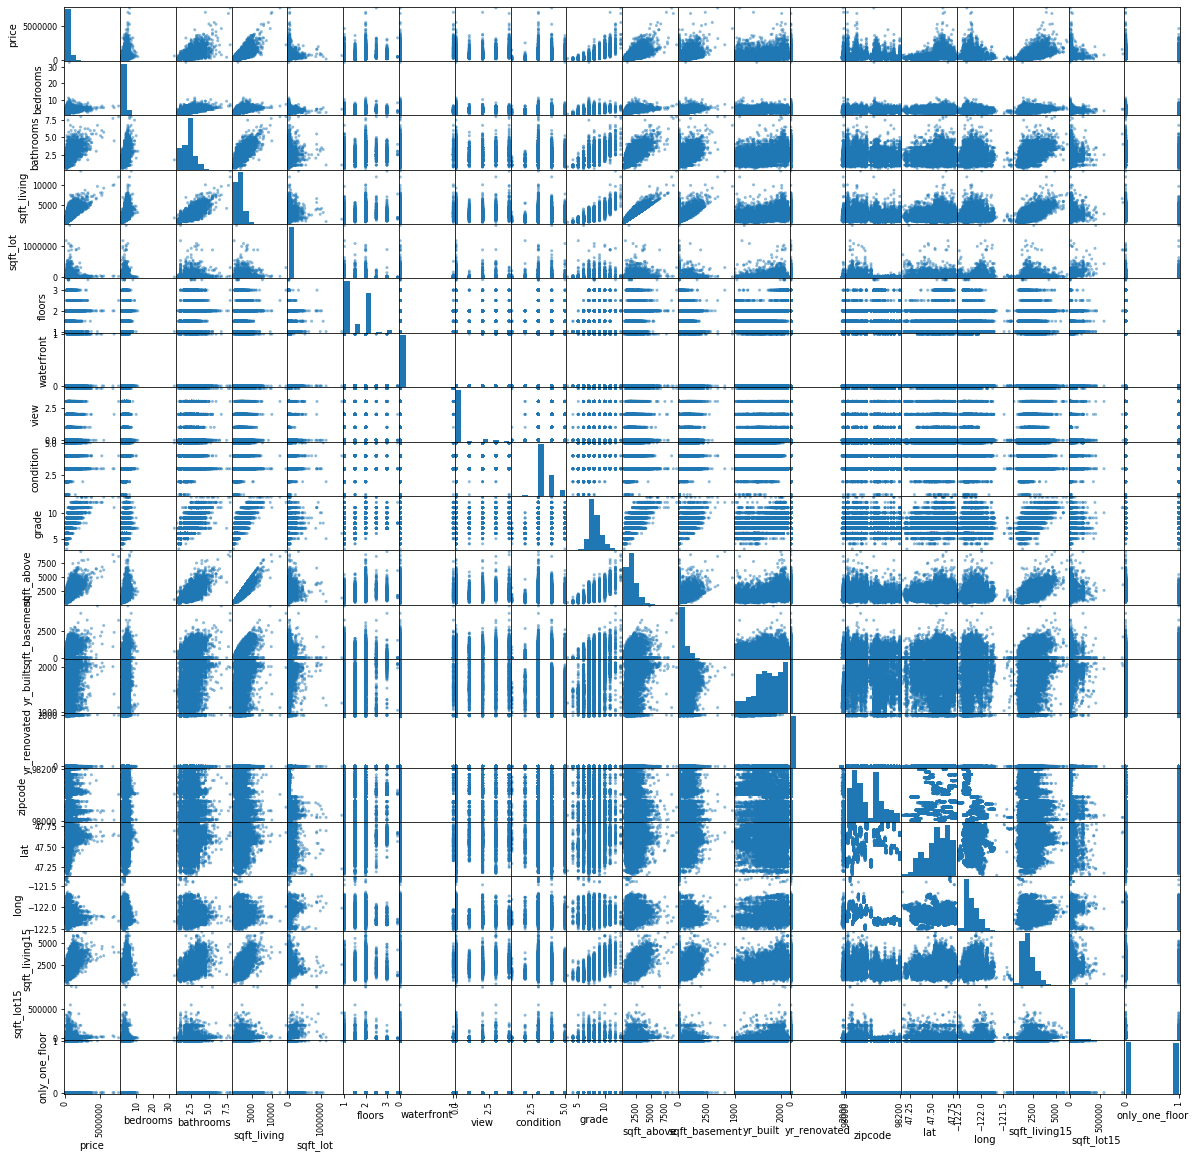

In [19]:
### Confusion Matrix and Correlation Heatmap
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

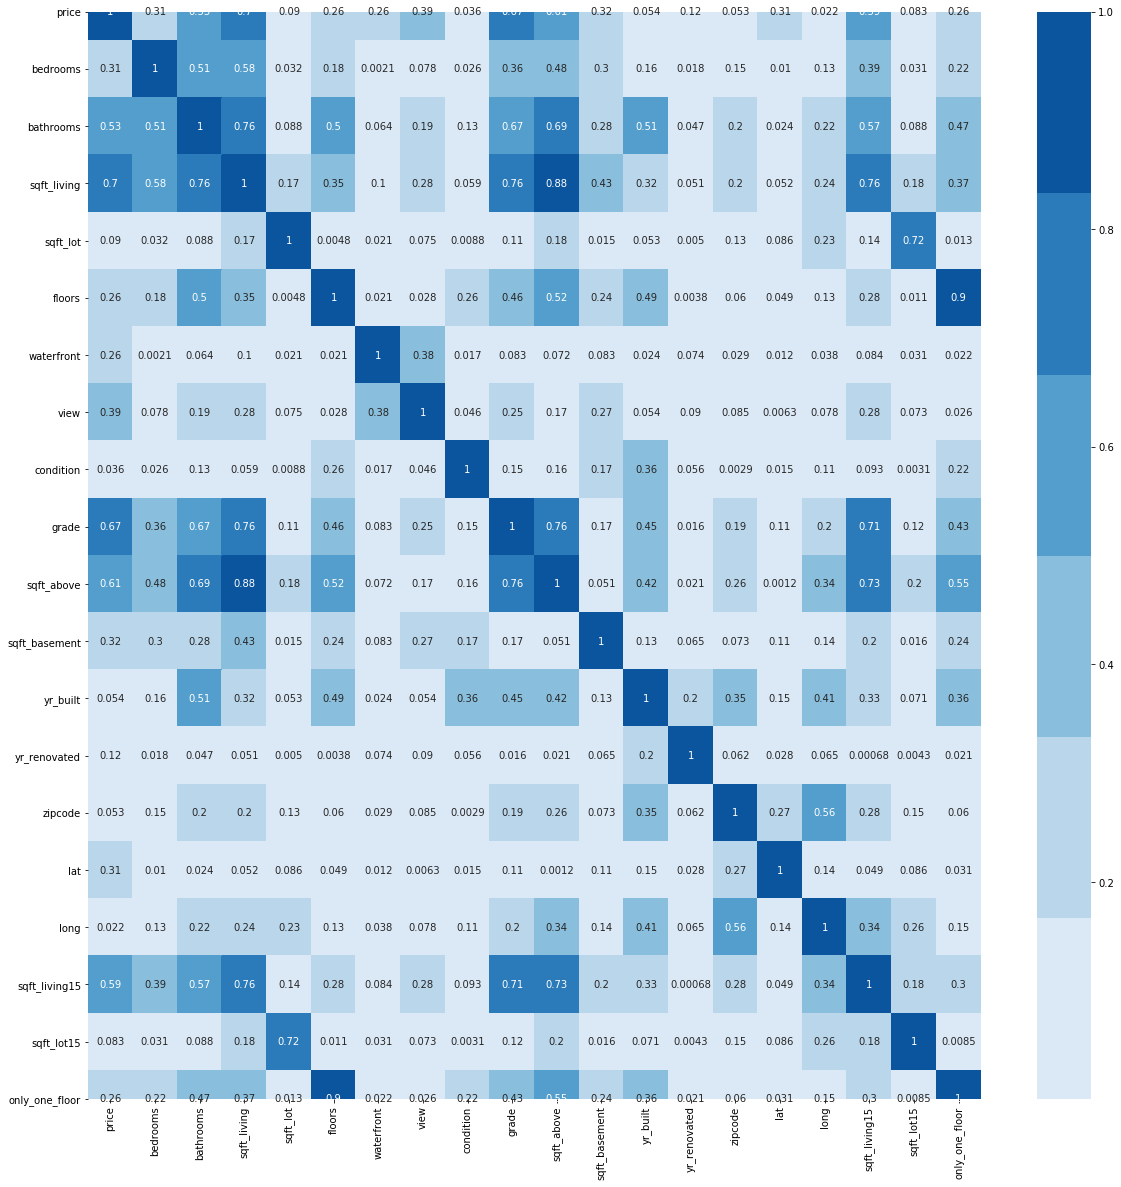

In [31]:
def make_heatmap(df=df, columns=None, figsize=(20, 20)):
    if columns is None:
        corr = df.corr()
    else:
        corr = df[columns].corr()

    plt.figure(figsize=figsize)
    sns.heatmap(np.abs(corr), cmap=sns.color_palette('Blues'), annot=True, fmt='0.2g')
    plt.show()

make_heatmap()

### Modeling / Cross Validation

### let's start with some features for our model building
- keep everything in the same cell, so you can make it a function, easily
- make sure you use variable names for everything so you can easily make it into a function

In [32]:
def make_ols_model(df=df, target='price', columns_to_use=None, add_constant=True):
    
    # just build a model and see the output

    X = df[columns_to_use]
    y = df[target]

    # add a constant to my X
    if add_constant:
        X = sm.add_constant(X)
    
    ols = sm.OLS(y, X)
    results = ols.fit()
    print(results.summary())
    return ols, results

In [33]:
# experiment 1 - use everything somewhat correlated to price
columns = ['sqft_living15', 'lat', 'sqft_above', 'grade', 'view', 'sqft_living', 'bathrooms', 'bedrooms']
ols = make_ols_model(columns_to_use=columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4783.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:18:19   Log-Likelihood:            -2.9638e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21588   BIC:                         5.928e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.181e+07   5.24e+05    -60.678

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Experiment 1 Summary
- 1 pvalue is greater than 0.05
- High condition number -> multicollinearity
- Not really worth investigating other aspects. Need to handle MC first. 

In [34]:
# dropping sqft_above and sqft_living15 since sqft_living has the highest coefficient
# sqft_living, bathrooms and bedrooms all are correlated

# how do we address this multicollinearity? 

In [35]:
# let's do some feature engineering!!!!

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,only_one_floor
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


In [36]:
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,only_one_floor,total_rooms
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,4.00
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,5.25
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,3.00
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,1,7.00
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,5.00


In [37]:
# Experiment 2
columns = ['lat', 'grade', 'view', 'sqft_living', 'total_rooms']
ols = make_ols_model(columns_to_use=columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     7642.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:18:21   Log-Likelihood:            -2.9639e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21591   BIC:                         5.928e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.198e+07   5.19e+05    -61.570      

### Experiment 2 Summary 
- Still high multicollinearity
- Need to adress lat/grade and view after I adress sqft_living and total_roms

In [38]:
# let's make a feature that combines the rooms and sqft_living

df["sqft_living_per_room"]  = df["sqft_living"] / (1.0 * df["total_rooms"])

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,only_one_floor,total_rooms,sqft_living_per_room
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,4.00,295.000000
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,5.25,489.523810
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,1,3.00,256.666667
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,7.00,280.000000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,5.00,336.000000


In [39]:
columns = ['lat', 'grade', 'view', 'sqft_living_per_room']
ols = make_ols_model(columns_to_use=columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     7602.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:18:22   Log-Likelihood:            -2.9790e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21592   BIC:                         5.958e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.084e+07 

### Experiment 3 Summary
- Wowzers, this model has high multicollinearity
- R2 went down by over 10 pts 

In [40]:
# Experiment 4
columns = ['lat', 'grade', 'view', 'bedrooms', 'bathrooms']
ols = make_ols_model(columns_to_use=columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     5822.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:18:24   Log-Likelihood:            -2.9817e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21591   BIC:                         5.964e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.223e+07   5.64e+05    -57.130      0.0

### Experiment 4 Summary
- need to start some statistical investigation to chop at these features

In [42]:
columns = ['price', 'lat', 'grade', 'view', 'bedrooms', 'bathrooms', 'sqft_living', 'total_rooms', 'sqft_living_per_room', 'log_sqft_living']
make_heatmap(df=df, columns=columns, figsize=(10, 10))

KeyError: "['log_sqft_living'] not in index"

In [43]:
def make_histogram(df=df, column='price'):
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20)
    plt.title(column)
    plt.show()

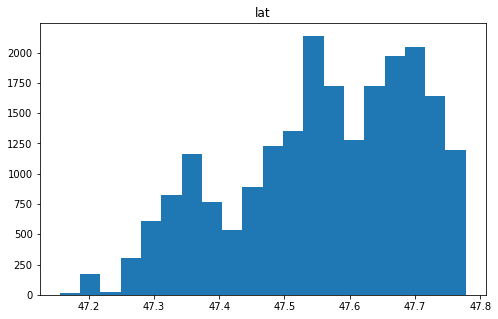

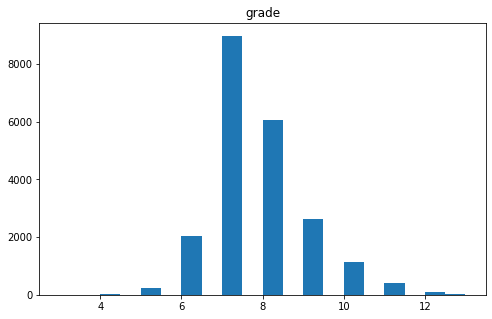

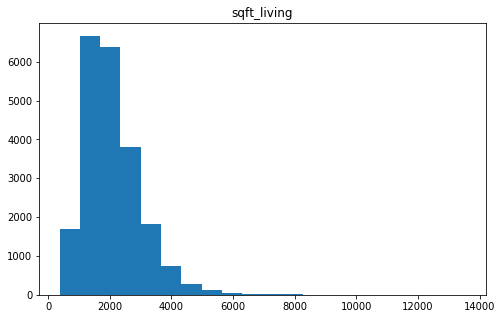

In [44]:
make_histogram(df=df, column='lat')
make_histogram(df=df, column='grade')
make_histogram(df=df, column='sqft_living')

In [45]:
df['log_sqft_living'] = np.log(df["sqft_living"])

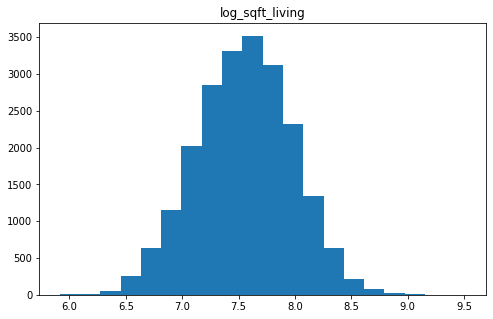

In [46]:
# this looks way more normal! 
make_histogram(df=df, column='log_sqft_living')

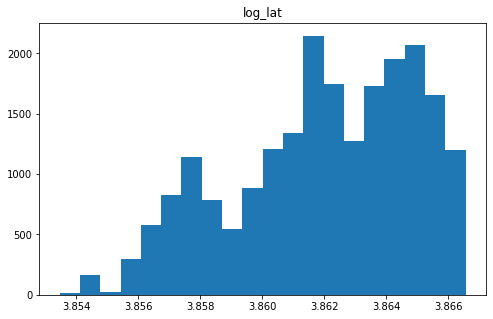

In [54]:
# log transforming latitude didn't seem to help much
df["log_lat"] = np.log(df["lat"])
make_histogram(df=df, column='log_lat')

In [74]:
# Experiment 5
columns = ['log_sqft_living', 'grade', 'lat']
ols, results = make_ols_model(columns_to_use=columns, add_constant=False)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                          3.553e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):                        0.00
Time:                        14:18:44   Log-Likelihood:                     -3.0059e+05
No. Observations:               21597   AIC:                                  6.012e+05
Df Residuals:                   21594   BIC:                                  6.012e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

### Finally, a model that looks good
- investigate the pvalues
    - look good
- investigate multicollinearity
    - looks good
- investigate residuals
    - normality
    - homoskedacicity

In [47]:
def make_residual_plots(residuals):
    # create xvalues for residual plot
    x = np.linspace(0, 1, residuals.shape[0])
    
    # plot residuals
    plt.figure(figsize=(8, 5))
    plt.scatter(x, residuals, alpha=0.7, c='purple')
    plt.title("Residuals")
    plt.hlines(y=0, colors='r', xmin=0, xmax=1, linewidth=3)
    plt.show()
    
    
    plt.figure(figsize=(8, 5))
    plt.hist(residuals, bins=20, color='purple')
    plt.title("Residuals Histogram")
    plt.show()

In [48]:
residuals = results.resid

make_residual_plots(residuals=residuals)

NameError: name 'results' is not defined

In [49]:
indices_to_drop = np.where(residuals>1000000)[0]

NameError: name 'residuals' is not defined

In [92]:
indices_to_drop

array([   21,   246,   269,   282,   300,   312,   518,   656,   779,
         814,  1030,  1150,  1162,  1270,  1280,  1313,  1359,  1431,
        1446,  1674,  1768,  1943,  2038,  2083,  2138,  2265,  2442,
        2471,  2624,  2862,  2897,  2972,  3018,  3037,  3089,  3278,
        3381,  3731,  3744,  3809,  3857,  3867,  3910,  4009,  4028,
        4031,  4145,  4186,  4264,  4335,  4407,  4631,  4758,  4855,
        4917,  4918,  5444,  5584,  5612,  5697,  5874,  5961,  6039,
        6189,  6396,  6502,  6708,  6765,  6777,  7028,  7184,  7245,
        7304,  7306,  7425,  7499,  7645,  7900,  7926,  7982,  8042,
        8085,  8184,  8215,  8629,  9166,  9245,  9313,  9478, 10252,
       10362, 10435, 10454, 10457, 11213, 11245, 11266, 11434, 11523,
       11608, 11674, 11940, 11963, 12174, 12358, 12447, 12636, 12638,
       12700, 12813, 12859, 13007, 13058, 13243, 13515, 13662, 13697,
       13954, 14017, 14039, 14070, 14126, 14172, 14241, 14372, 14499,
       14536, 14542,

In [93]:
df_trimmed = df.drop(index=indices_to_drop)
df_trimmed.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,only_one_floor,total_rooms,sqft_living_per_room,log_sqft_living,log_lat
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,98178,47.5112,-122.257,1340,5650,1,4.00,295.000000,7.073270,3.860965
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,0,5.25,489.523810,7.851661,3.865372
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720,8062,1,3.00,256.666667,6.646391,3.865726
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,1,7.00,280.000000,7.580700,3.861168
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,1,5.00,336.000000,7.426549,3.863186


### let's rerun the experiment from above after removing outlier residuals

In [95]:
# experiment 6
columns = ['log_sqft_living', 'grade', 'lat']
ols, results = make_ols_model(df=df_trimmed, columns_to_use=columns, add_constant=False)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          5.330e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):                        0.00
Time:                        14:25:49   Log-Likelihood:                     -2.9201e+05
No. Observations:               21397   AIC:                                  5.840e+05
Df Residuals:                   21394   BIC:                                  5.840e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

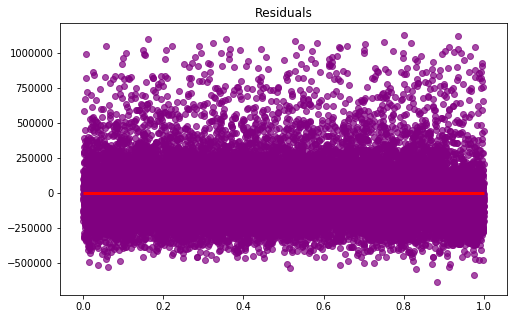

In [96]:
residuals = results.resid

make_residual_plots(residuals=residuals)

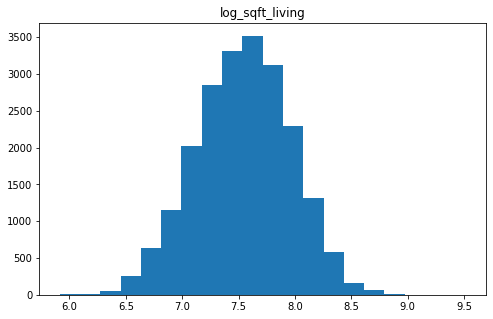

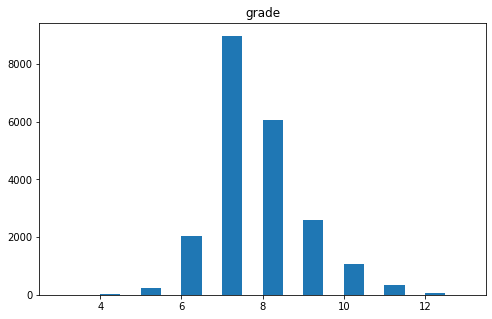

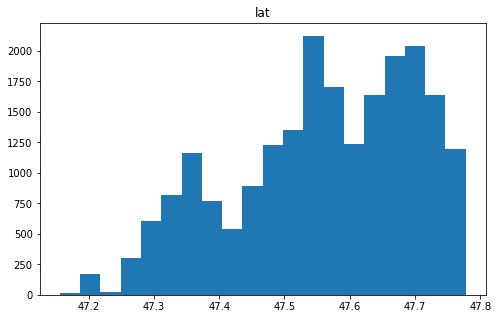

In [97]:
for col in ['log_sqft_living', 'grade', 'lat']:
    make_histogram(df=df_trimmed, column=col)

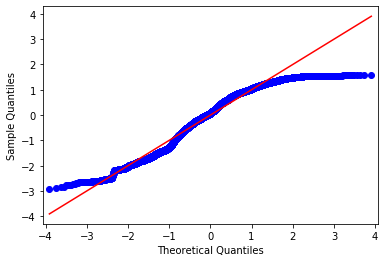

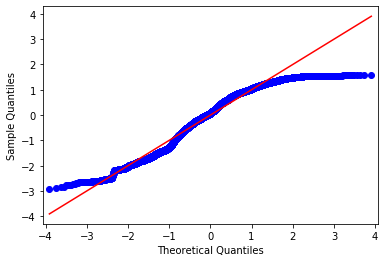

In [106]:
sm.qqplot(df_trimmed["lat"], fit=True, line='s')

### let's transform our lat data to try and make it more normal

In [108]:
lat_boxcox, lam = scs.boxcox(df_trimmed["lat"])

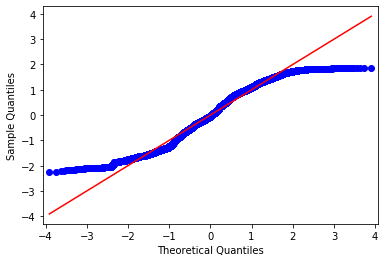

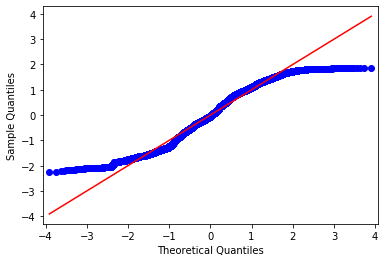

In [110]:
sm.qqplot(lat_boxcox, fit=True, line='s')

In [112]:
df_trimmed["lat_boxcox"] = lat_boxcox

In [117]:
ols, res = make_ols_model(df_trimmed, columns_to_use=['log_sqft_living', 'grade', 'lat'], add_constant=False)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          5.330e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):                        0.00
Time:                        14:37:20   Log-Likelihood:                     -2.9201e+05
No. Observations:               21397   AIC:                                  5.840e+05
Df Residuals:                   21394   BIC:                                  5.840e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

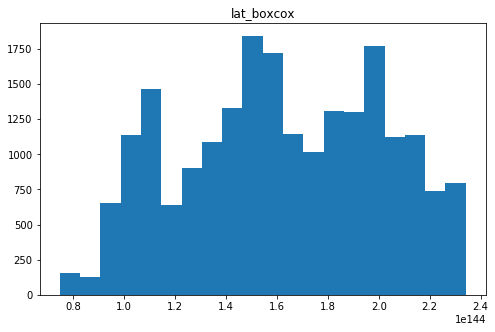

In [118]:
make_histogram(df=df_trimmed, column='lat_boxcox')

In [120]:
df_trimmed["lat_changed"] = df_trimmed["lat"] - df_trimmed.lat.min()

In [122]:
ols, res = make_ols_model(df=df_trimmed, columns_to_use=['lat_changed', 'log_sqft_living', 'grade'], add_constant=False)



                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                          5.004e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):                        0.00
Time:                        14:40:01   Log-Likelihood:                     -2.9260e+05
No. Observations:               21397   AIC:                                  5.852e+05
Df Residuals:                   21394   BIC:                                  5.852e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

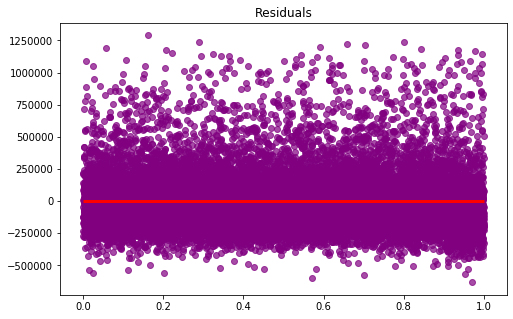

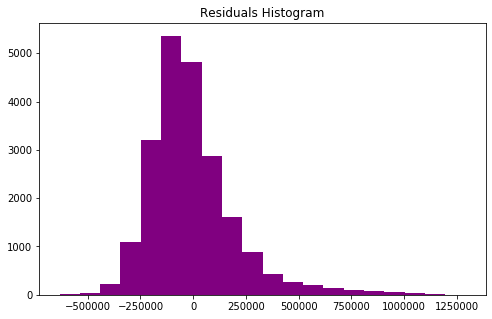

In [126]:
make_residual_plots(res.resid)

### What did you learn?
- Keep trying and trying
- Learn from experiments to adjust the next one for improvement
- define functions
- find the colinear variables using models and heatmaps
- general flow for modeling OLS
- interpreting residuals

# let's keep these features and try and transform them as much as possible

### Interpret

### Command to convert your notebook to a README.md

```jupyter nbconvert --to markdown student.ipynb```

then 


```mv README.md README_old.md```


then finally

```mv student.md README.md```


In [50]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,only_one_floor,total_rooms,sqft_living_per_room,log_sqft_living
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,1,4.00,295.000000,7.073270
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,47.7210,-122.319,1690,7639,0,5.25,489.523810,7.851661
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,98028,47.7379,-122.233,2720,8062,1,3.00,256.666667,6.646391
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,47.5208,-122.393,1360,5000,1,7.00,280.000000,7.580700
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,47.6168,-122.045,1800,7503,1,5.00,336.000000,7.426549


In [51]:

ols, res = make_ols_model(df, columns_to_use=['sqft_living', 'grade', 'lat'], add_constant=False)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                          4.149e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):                        0.00
Time:                        13:25:12   Log-Likelihood:                     -2.9918e+05
No. Observations:               21597   AIC:                                  5.984e+05
Df Residuals:                   21594   BIC:                                  5.984e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### Questions on OLS Summary above
- Cover aspects of statsmodels ols summary
    - Condition Number (lower is better)
    - pvalues
        - the confidence that your feature is not random
        - lower is better
    - [0.025 0.9750]
        - how much our target changes per unit 
        - for every 1 sqft of changes our target will change between 180.226 and 191.521 dollars 95% of the time
    - jarque-bera (lower is better)
        - a measure of normality (which is measured by skewness and kurtotis)
        - geometric mean of skewness and kurtosis
    - skewness score is perfect if = 0
        - 0 means the data is symmetrical
    - kurtosis score is perfect if = 0 (Fisher) or 3 (Pearson)
    - F-Statistic
        - F-Stat measures our confidence that our features can predict our target linearly
        - low (less than 0.05) this means that OLS is a valid model linearity
    - Coefficients
        - rate that target changes per feature unit change

In [54]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
X = df[['sqft_living', 'grade', 'lat']]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# instantiate a model
linreg = LinearRegression(fit_intercept=False)

# fit the model aka find the beta coefficients
linreg.fit(X_train, y_train)

# score the model
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))
print(linreg.score(X, y))
# evaluate the model

print(linreg.coef_)

0.5436100711570111
0.5288497316493155
0.5323142378872625
[   188.78618552  95911.55772198 -12325.37949115]


### let's do some cross validation
###  saved at the end to ensure that you aren't lying to yourself

In [70]:
# instantiate a model (estimator) (sklearn)

linreg = LinearRegression(fit_intercept=True)


# instantitate a cross_val_score object

cv = cross_val_score(linreg, X, y, cv=5, n_jobs=-1, scoring='r2', verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


### Summary of above
I have some terrible r2 scores above, but they're similar for train/test which means I'm not overfitting. 

In [71]:
cv.mean()

0.595592898694831

In [72]:
cv.std()

0.015144785642707662